In [1]:
%pip install opencv-python matplotlib scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/12.8 MB 4.4 MB/s eta 0:00:03
   --------- ------------------------------ 2.9/12.8 MB 4.9 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/12.8 MB 5.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.9/12.8 MB 4.0 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.8 MB 3.6 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/12.8 MB 3.3 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/12.8 MB 3.1 MB/s eta 0:00:03
   --------------- ------------------------ 5.0/12.8 MB 2.8 MB/s eta 0:00:03
   ----------------- ---------------------- 5.5/12.8 MB 2.8 MB/s eta 0:00:03
   ------------------- -------------------- 6.3/12.8 MB 2.8 MB/s eta 0:00:03
   -------------------- ------------------- 6.6/12.8 MB 2.6 MB/s eta 0:00:03
   ---

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import colorsys

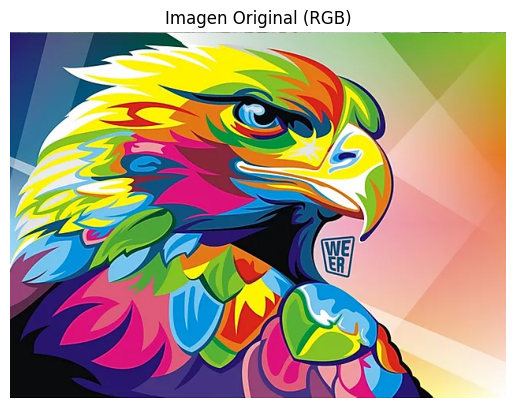

In [3]:


# Leer imagen desde archivo
img_bgr = cv2.imread('../datos/Imagen_Original.png')  

# Convertir de BGR (formato por defecto de OpenCV) a RGB (formato visual humano)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
plt.imshow(img_rgb)
plt.title("Imagen Original (RGB)")
plt.axis('off')
plt.show()


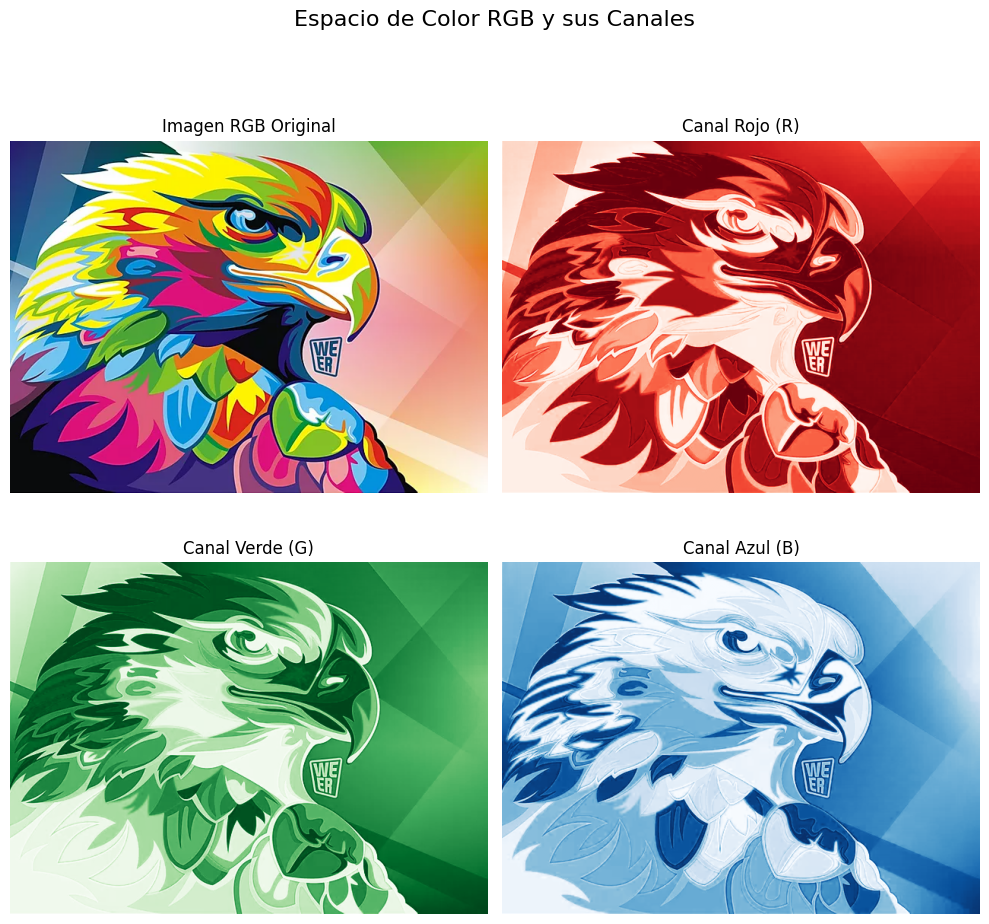


--- Explicación Canales RGB ---
R (Rojo): Intensidad del componente rojo. Valores altos = más rojo.
G (Verde): Intensidad del componente verde. Valores altos = más verde.
B (Azul): Intensidad del componente azul. Valores altos = más azul.
La combinación de estas tres intensidades crea todos los colores visibles en la pantalla.
------------------------------


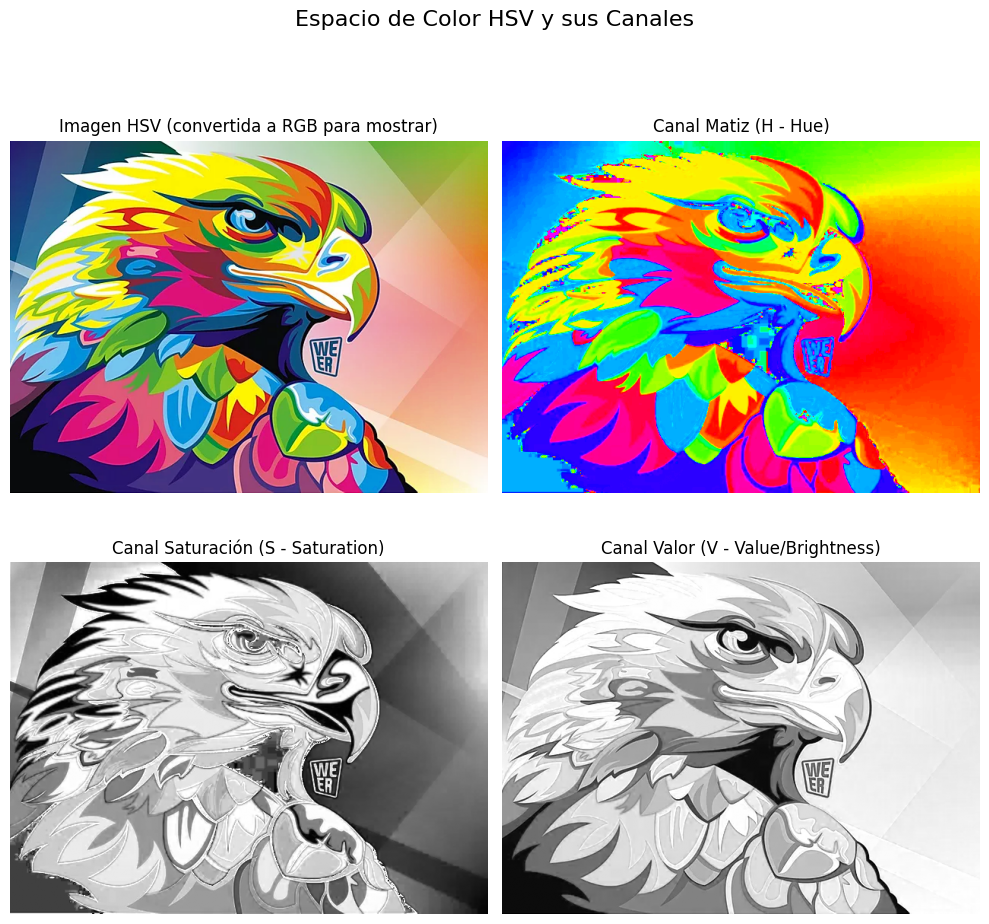


--- Explicación Canales HSV ---
H (Matiz/Hue): Representa el tipo de color (rojo, amarillo, verde, azul, etc.). Es un ángulo en el cilindro de color (0-179 en OpenCV uint8).
S (Saturación/Saturation): Pureza del color. Valores bajos = color deslavado, cercano al gris. Valores altos = color vivo y puro.
V (Valor/Value o Brillo/Brightness): Luminosidad o brillo del color. Valores bajos = oscuro. Valores altos = brillante.
HSV es más intuitivo para la percepción humana del color (ej. 'quiero un rojo más brillante' afecta V, 'un rojo más intenso' afecta S).
------------------------------


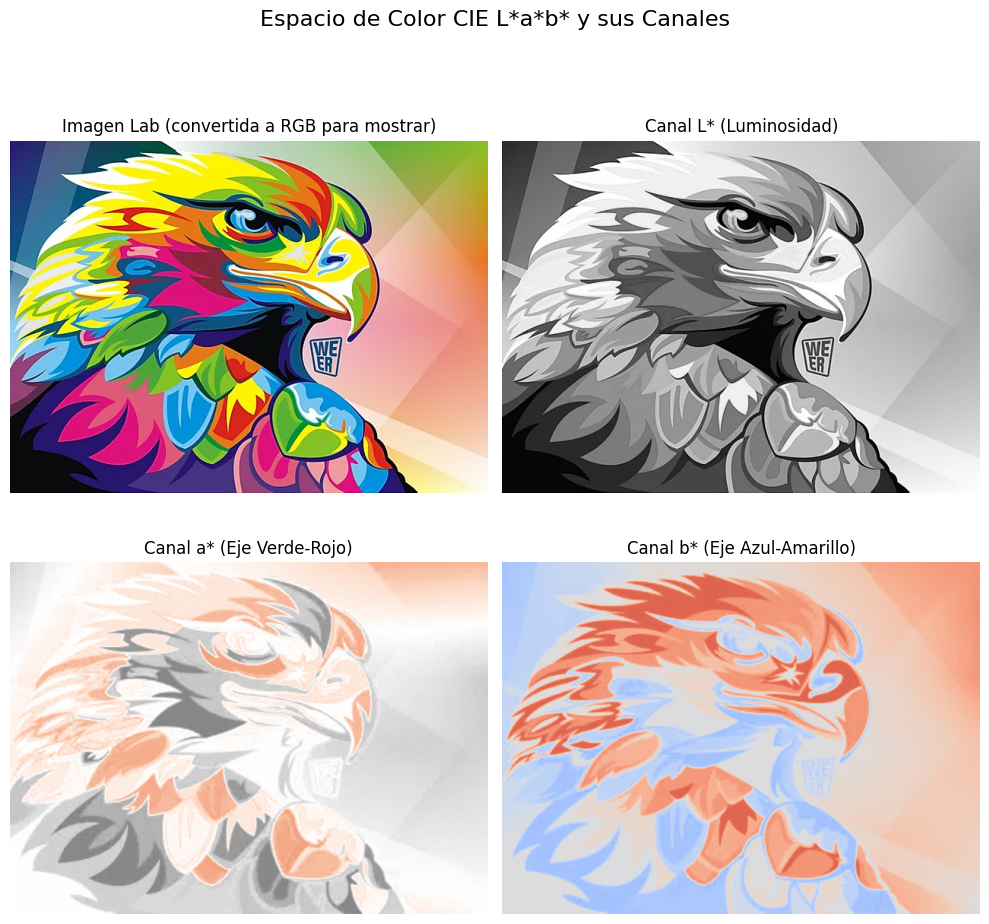


--- Explicación Canales CIE L*a*b* ---
L* (Luminosidad): Similar al canal V de HSV, representa el brillo percibido (0=negro, 100=blanco).
a* (Eje verde-rojo): Representa la posición del color en el eje que va del verde (valores negativos) al rojo/magenta (valores positivos). Cero es acromático (gris).
b* (Eje azul-amarillo): Representa la posición del color en el eje que va del azul (valores negativos) al amarillo (valores positivos). Cero es acromático (gris).
CIE Lab está diseñado para ser perceptualmente uniforme: un cambio numérico similar en los valores de color produce un cambio perceptual similar.
Es muy útil para medir diferencias de color y para procesamientos donde la luminancia debe separarse del color.
------------------------------


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color as skimage_color # Usaremos skimage para Lab por sus rangos más intuitivos
# colorsys es más para conversiones de un solo píxel, cv2 y skimage son mejores para imágenes

def load_and_convert_image(image_path):
    """Carga una imagen, la convierte a RGB, HSV y Lab."""
    # Cargar la imagen con OpenCV (carga en formato BGR por defecto)
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"Error: No se pudo cargar la imagen en {image_path}")
        return None, None, None, None

    # Convertir de BGR a RGB (matplotlib espera RGB)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Convertir de RGB a HSV usando OpenCV
    # OpenCV devuelve H en [0, 179], S en [0, 255], V en [0, 255] para uint8
    img_hsv_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Convertir de RGB a CIE Lab usando skimage.color
    # skimage.color.rgb2lab espera RGB en float [0,1] o uint8 [0,255]
    # Devuelve L en [0, 100], a y b en [-128, 127] (aproximadamente)
    img_lab_sk = skimage_color.rgb2lab(img_rgb) # skimage maneja la normalización si es uint8

    return img_rgb, img_hsv_cv, img_lab_sk, img_bgr

def visualize_channels(img_rgb, img_hsv, img_lab):
    """Visualiza la imagen original y los canales de RGB, HSV y Lab."""

    # --- Canales RGB ---
    r, g, b = cv2.split(img_rgb)

    fig1, axs1 = plt.subplots(2, 2, figsize=(10, 10))
    fig1.suptitle('Espacio de Color RGB y sus Canales', fontsize=16)

    axs1[0, 0].imshow(img_rgb)
    axs1[0, 0].set_title('Imagen RGB Original')
    axs1[0, 0].axis('off')

    axs1[0, 1].imshow(r, cmap='Reds') # Usar cmap 'Reds' o 'gray'
    axs1[0, 1].set_title('Canal Rojo (R)')
    axs1[0, 1].axis('off')

    axs1[1, 0].imshow(g, cmap='Greens') # Usar cmap 'Greens' o 'gray'
    axs1[1, 0].set_title('Canal Verde (G)')
    axs1[1, 0].axis('off')

    axs1[1, 1].imshow(b, cmap='Blues') # Usar cmap 'Blues' o 'gray'
    axs1[1, 1].set_title('Canal Azul (B)')
    axs1[1, 1].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar para el suptitle
    plt.show()

    print("\n--- Explicación Canales RGB ---")
    print("R (Rojo): Intensidad del componente rojo. Valores altos = más rojo.")
    print("G (Verde): Intensidad del componente verde. Valores altos = más verde.")
    print("B (Azul): Intensidad del componente azul. Valores altos = más azul.")
    print("La combinación de estas tres intensidades crea todos los colores visibles en la pantalla.")
    print("-" * 30)

    # --- Canales HSV ---
    # OpenCV: H [0,179], S [0,255], V [0,255]
    h_cv, s_cv, v_cv = cv2.split(img_hsv)

    # Para visualizar H de forma más intuitiva, a veces se normaliza a [0,360] o se usa un cmap cíclico
    # Aquí lo mostramos directamente como valores.
    
    # Reconstruir una versión RGB de HSV para comparación visual
    img_hsv_display_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)


    fig2, axs2 = plt.subplots(2, 2, figsize=(10, 10))
    fig2.suptitle('Espacio de Color HSV y sus Canales', fontsize=16)

    axs2[0, 0].imshow(img_hsv_display_rgb) # Mostramos la reconstrucción RGB desde HSV
    axs2[0, 0].set_title('Imagen HSV (convertida a RGB para mostrar)')
    axs2[0, 0].axis('off')

    axs2[0, 1].imshow(h_cv, cmap='hsv') # cmap 'hsv' es bueno para el canal Hue
    axs2[0, 1].set_title('Canal Matiz (H - Hue)')
    axs2[0, 1].axis('off')

    axs2[1, 0].imshow(s_cv, cmap='gray')
    axs2[1, 0].set_title('Canal Saturación (S - Saturation)')
    axs2[1, 0].axis('off')

    axs2[1, 1].imshow(v_cv, cmap='gray')
    axs2[1, 1].set_title('Canal Valor (V - Value/Brightness)')
    axs2[1, 1].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print("\n--- Explicación Canales HSV ---")
    print("H (Matiz/Hue): Representa el tipo de color (rojo, amarillo, verde, azul, etc.). Es un ángulo en el cilindro de color (0-179 en OpenCV uint8).")
    print("S (Saturación/Saturation): Pureza del color. Valores bajos = color deslavado, cercano al gris. Valores altos = color vivo y puro.")
    print("V (Valor/Value o Brillo/Brightness): Luminosidad o brillo del color. Valores bajos = oscuro. Valores altos = brillante.")
    print("HSV es más intuitivo para la percepción humana del color (ej. 'quiero un rojo más brillante' afecta V, 'un rojo más intenso' afecta S).")
    print("-" * 30)

    # --- Canales CIE Lab ---
    # skimage: L [0,100], a [-127,128~], b [-127,128~]
    l_sk = img_lab[:, :, 0]
    a_sk = img_lab[:, :, 1]
    b_sk = img_lab[:, :, 2]
    
    # Reconstruir una versión RGB de Lab para comparación visual (skimage)
    img_lab_display_rgb = skimage_color.lab2rgb(img_lab)
    # lab2rgb puede devolver valores fuera de [0,1] si el Lab original estaba fuera del gamut RGB.
    # Es importante hacer clipping para visualización correcta.
    img_lab_display_rgb_clipped = np.clip(img_lab_display_rgb, 0, 1)


    fig3, axs3 = plt.subplots(2, 2, figsize=(10, 10))
    fig3.suptitle('Espacio de Color CIE L*a*b* y sus Canales', fontsize=16)

    axs3[0, 0].imshow(img_lab_display_rgb_clipped) # Mostramos la reconstrucción RGB desde Lab
    axs3[0, 0].set_title('Imagen Lab (convertida a RGB para mostrar)')
    axs3[0, 0].axis('off')

    # Para visualizar L, a, b, es común normalizarlos a [0,255] para cmap='gray'
    # L ya está en un rango positivo [0,100]. a y b son bipolares.
    # Visualizarlos en escala de grises: los valores medios (cero para a y b) serán grises medios.
    
    axs3[0, 1].imshow(l_sk, cmap='gray', vmin=0, vmax=100)
    axs3[0, 1].set_title('Canal L* (Luminosidad)')
    axs3[0, 1].axis('off')

    # Para a* y b*, el cero es el punto medio (gris). Usaremos un cmap divergente.
    # 'RdBu_r' (Red-Blue reversed) va de azul (negativo) a rojo (positivo)
    # 'PiYG' (Pink-YellowGreen) va de verde (negativo) a magenta/rosa (positivo)
    # 'coolwarm' o 'bwr' también son comunes.
    # Normalizamos los rangos esperados para el colormap
    norm_a = plt.Normalize(vmin=-128, vmax=127)
    norm_b = plt.Normalize(vmin=-128, vmax=127)
    
    axs3[1, 0].imshow(a_sk, cmap='RdGy', norm=norm_a) # Verde a Magenta/Rojo. Valores más negativos son más verdes, más positivos son más rojos/magentas.
    axs3[1, 0].set_title('Canal a* (Eje Verde-Rojo)')
    axs3[1, 0].axis('off')

    axs3[1, 1].imshow(b_sk, cmap='coolwarm', norm=norm_b) # Azul a Amarillo. Valores más negativos son más azules, más positivos son más amarillos.
    axs3[1, 1].set_title('Canal b* (Eje Azul-Amarillo)')
    axs3[1, 1].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print("\n--- Explicación Canales CIE L*a*b* ---")
    print("L* (Luminosidad): Similar al canal V de HSV, representa el brillo percibido (0=negro, 100=blanco).")
    print("a* (Eje verde-rojo): Representa la posición del color en el eje que va del verde (valores negativos) al rojo/magenta (valores positivos). Cero es acromático (gris).")
    print("b* (Eje azul-amarillo): Representa la posición del color en el eje que va del azul (valores negativos) al amarillo (valores positivos). Cero es acromático (gris).")
    print("CIE Lab está diseñado para ser perceptualmente uniforme: un cambio numérico similar en los valores de color produce un cambio perceptual similar.")
    print("Es muy útil para medir diferencias de color y para procesamientos donde la luminancia debe separarse del color.")
    print("-" * 30)


# --- Programa Principal ---
if __name__ == "__main__":

    image_file_path = '../datos/Imagen_Original.png' # <--- CAMBIA ESTO

    
    img_rgb, img_hsv, img_lab, img_bgr = load_and_convert_image(image_file_path)

    if img_rgb is None:
        print(f"Generando una imagen de ejemplo porque '{image_file_path}' no se pudo cargar.")
        # Generar una imagen de ejemplo colorida
        gradient = np.linspace(0, 1, 256)
        color_gradient_r = np.outer(gradient, np.ones_like(gradient))
        color_gradient_g = np.outer(np.ones_like(gradient), gradient)
        color_gradient_b = np.outer(np.sin(gradient * np.pi), np.cos(gradient * np.pi * 0.5))
        color_gradient_b = (color_gradient_b - np.min(color_gradient_b)) / (np.max(color_gradient_b) - np.min(color_gradient_b)) # Normalizar B

        img_rgb = np.stack((color_gradient_r, color_gradient_g, color_gradient_b), axis=-1)
        img_rgb = (img_rgb * 255).astype(np.uint8) # Convertir a uint8

        img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
        img_lab = skimage_color.rgb2lab(img_rgb)

    if img_rgb is not None:
        visualize_channels(img_rgb, img_hsv, img_lab)
    else:
        print("No se pudo procesar ninguna imagen.")

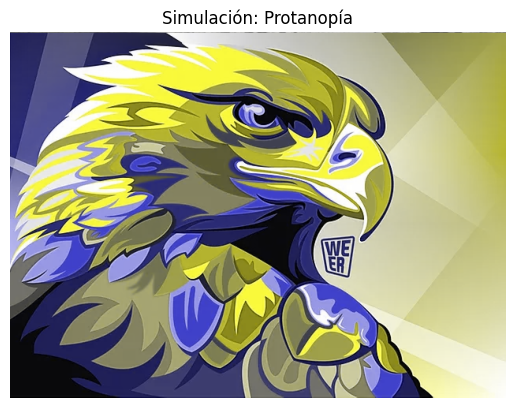

In [ ]:
# Simulación de daltonismo (protanopía) usando una matriz de transformación aproximada
def simulate_protanopia(img):
    # Matriz de simulación para protanopía (color rojo afectado)
    matrix = np.array([[0.56667, 0.43333, 0],
                       [0.55833, 0.44167, 0],
                       [0, 0.24167, 0.75833]])
    
    # Reestructurar imagen para aplicar la matriz
    flat_img = img.reshape(-1, 3)
    
    # Multiplicar por la matriz y rearmar
    simulated = flat_img @ matrix.T
    simulated = simulated.reshape(img.shape)
    
    # Normalizar para mostrar
    return np.clip(simulated / 255.0, 0, 1)

# Mostrar imagen simulando protanopía
plt.imshow(simulate_protanopia(img_rgb))
plt.title("Simulación: Protanopía")
plt.axis('off')
plt.show()


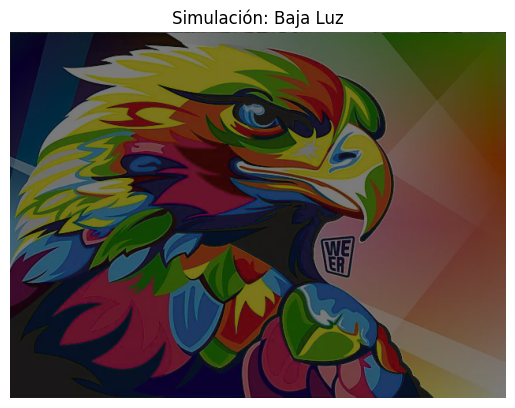

In [7]:
#Simulación de baja iluminación (brillo y contraste reducido)
def reduce_brightness_contrast(img, alpha=0.6, beta=-30):
    # alpha < 1 reduce contraste, beta < 0 reduce brillo
    img_mod = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img_mod

# Mostrar imagen con baja iluminación simulada
plt.imshow(reduce_brightness_contrast(img_rgb))
plt.title("Simulación: Baja Luz")
plt.axis('off')
plt.show()

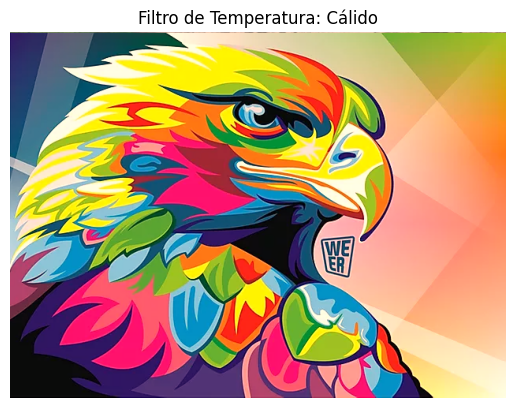

In [16]:
# Filtro de temperatura de color (cálido o frío)
def apply_temperature_filter(img, mode='warm'):
    img = img.astype(np.float32)
    
    if mode == 'cool':
        # Aumentar rojo, disminuir azul para un efecto frío
        img[:, :, 0] *= 0.9   # Azul ↓
        img[:, :, 1] *= 1.0   # Verde igual
        img[:, :, 2] *= 1.2   # Rojo ↑
    elif mode == 'warm':
        # Aumentar azul, disminuir rojo para un efecto cálido
        img[:, :, 0] *= 1.2   # Azul ↑
        img[:, :, 1] *= 1.0   # Verde igual
        img[:, :, 2] *= 0.9   # Rojo ↓
    return np.clip(img / 255.0, 0, 1)

# Mostrar filtro cálido aplicado
plt.imshow(apply_temperature_filter(img_rgb, 'warm'))
plt.title("Filtro de Temperatura: Cálido")
plt.axis('off')
plt.show()


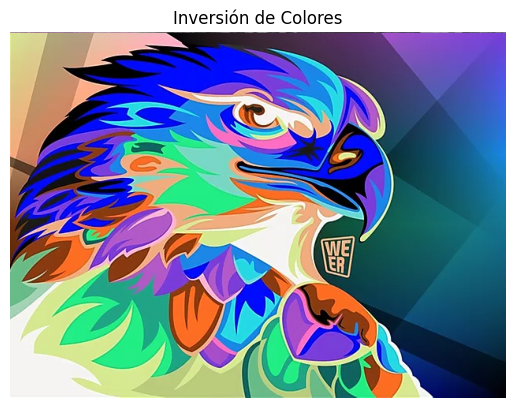

In [9]:
# Inversión de colores
plt.imshow(1.0 - img_rgb / 255.0)  # Restar los valores RGB a 1 para invertir
plt.title("Inversión de Colores")
plt.axis('off')
plt.show()


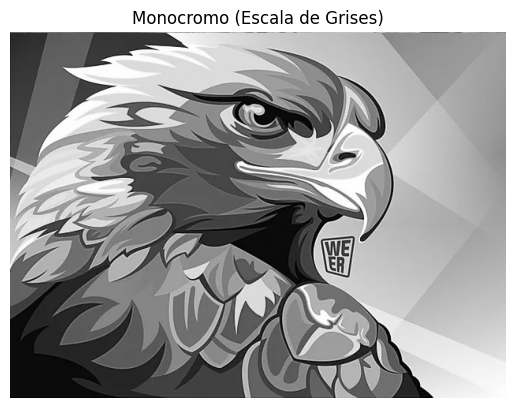

In [10]:
# Escala de grises (monocromo)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.title("Monocromo (Escala de Grises)")
plt.axis('off')
plt.show()


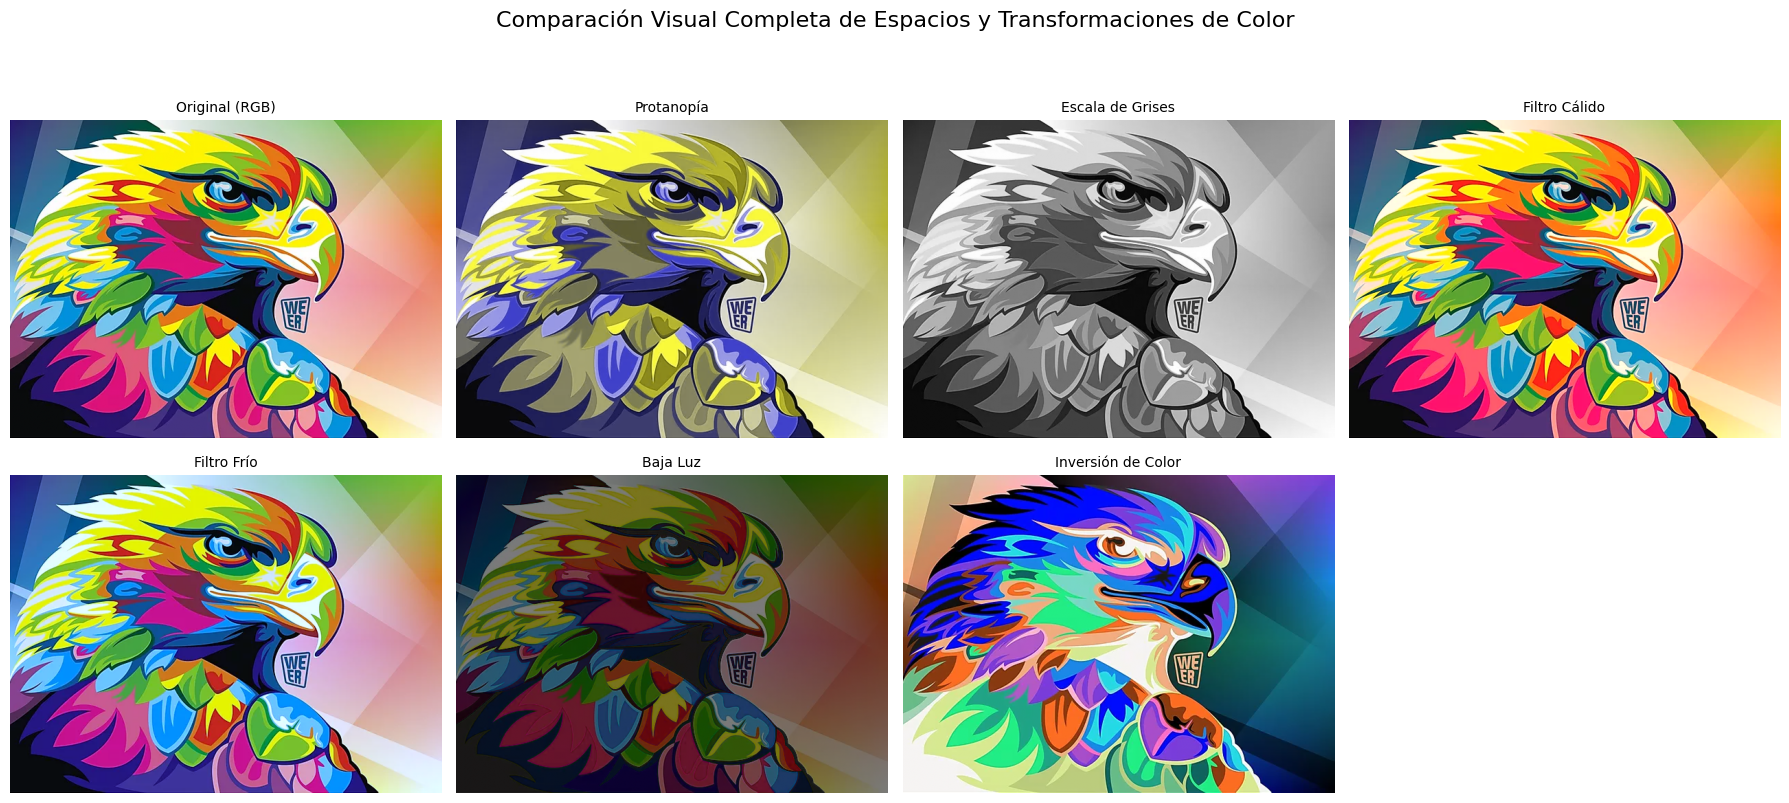

In [29]:

# Diccionario con todos los efectos a mostrar
def get_all_variants(img):
    variants = {
        'Original (RGB)': img / 255.0,
        'Protanopía': simulate_protanopia(img),
        'Escala de Grises': np.stack([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)]*3, axis=-1) / 255.0,
        'Filtro Cálido': apply_temperature_filter(img, 'warm'),
        'Filtro Frío': apply_temperature_filter(img, 'cool'),
        'Baja Luz': reduce_brightness_contrast(img) / 255.0,
        'Inversión de Color': 1.0 - img / 255.0,
    }



    return variants

# Obtener todas las variantes
variants = get_all_variants(img_rgb)

# Mostrar en una cuadrícula de 4x4
plt.figure(figsize=(18, 16))

for i, (title, image) in enumerate(variants.items()):
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(title, fontsize=10)
    plt.axis('off')

plt.suptitle("Comparación Visual Completa de Espacios y Transformaciones de Color", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()